In [1]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Bài 3 - Sinh số ngẫu nhiên (Random number generation)

**THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (CLC)**

*(Vũ Quốc Hoàng, FIT - HCMUS, vqhoang@fit.hcmus.edu.vn)*

## Chủ đề

1. Các bộ sinh số giả ngẫu nhiên
2. Các phân phối rời rạc
3. Phương pháp biến đổi ngược
4. Phương pháp lấy mẫu loại bỏ
5. Biến đổi của các biến ngẫu nhiên
6. Các phương pháp chuyên dụng

## Minh họa mở đầu

**Yêu cầu.** Từ một đồng xu có xác suất ra ngửa là $p$ $(0 < p < 1)$. Ta không biết giá trị của $p$, tìm cách sinh một biến cố có xác suất là 50%.

In [2]:
def tung_dong_xu():
    p = 0.7 # unknown
    return random.choices([0, 1], [1 - p, p])[0]

def tan_xuat(e, N):
    return sum(e() for _ in range(N))/N

tan_xuat(tung_dong_xu, 10000)

0.6991

**Trả lời.** Ta có thể sinh một biến cố có xác suất là 50% bằng thủ tục sau

> *Bước 1.* Tung đồng xu 2 lần, gọi $m_1, m_2$ lần lượt là mặt ra của đồng xu ở lần 1, lần 2.
>
> *Bước 2.* Lặp lại Bước 1 cho đến khi $m_1 \neq m_2$.
>
> *Bước 3.* Trả về biến cố "$m_1$ là ngửa".

In [3]:
def tung_dong_xu_can_bang():
    while True:
        m1 = tung_dong_xu()
        m2 = tung_dong_xu()
        if m1 != m2:
            break
    return m1

tan_xuat(tung_dong_xu_can_bang, 10000)

0.5002

## Các bộ sinh số giả ngẫu nhiên

### Thuật toán LCG

In [4]:
# Algorithm LCG
# Input:
#   N (output sequence length)
#   m > 1 (modulus)
#   a ∈ {1, 2, . . . , m − 1} (multiplier)
#   c ∈ {0, 1, . . . , m − 1} (increment)
#   X0 ∈ {0, 1, . . . , m − 1} (seed)
# Output: a sequence X1, X2, X3, . . . of pseudo random numbers
def LCG(N, m, a, c, X0=0):
    X = np.zeros((N,), dtype="int64")
    Xn = X0
    for n in range(N):
        Xn = (a*Xn + c) % m
        X[n] = Xn
    return X

In [5]:
N = 10
x = LCG(N, m=8, a=5, c=1, X0=0)
pd.DataFrame({"$n$": range(1, N+1), "$X_n$": x})

,$n$,$X_n$
0,1,1
1,2,6
2,3,7
3,4,4
4,5,5
5,6,2
6,7,3
7,8,0
8,9,1
9,10,6


In [6]:
LCG(N=100, m=2**32, a=1103515245, c=12345, X0=0)

array([     12345, 3554416254, 2802067423, 3596950572,  229283573,
       3256818826, 1051550459, 3441282840, 2941955441,  551188310,
       2951033815, 1772930244, 2518396845,  639546082, 1381971571,
       1695770928, 2121308585, 3866696494, 3144468175, 1157490780,
       3490719589, 2684337210, 1511588075, 1538207304, 2103497953,
       2854052358, 3104096455, 3668764404, 1588911645, 2518522002,
         33727075, 1680572000,   88489753, 3430460382,  527630783,
       1194991756, 3253908437, 3001001962, 2539649755, 1387182456,
       1538766929,  654858422, 4233718199, 3939628324, 2985199757,
       3661187650, 2417027667, 3452649360, 1179132041, 3650472078,
       1941297327, 2999764156, 1787378757, 1328144282, 2182172875,
       2952753320, 2382780353, 1203133286, 2942447271,  321843028,
       3873419005,  154978290, 2331577923,  422948032, 1929199097,
       1179349310, 1049906079, 2955465964,  214614197,  973693770,
        662438587,  809784280,  263435057, 2030201366, 3848146

In [7]:
x = LCG(N=2000, m=1024, a=493, c=123, X0=0)
print(len(np.unique(x)))
print(x[:10])
print(x[1024 : 1024 + 10])

1024
[123 346 717 324 111 574 481 712 931 354]
[123 346 717 324 111 574 481 712 931 354]


### Chất lượng của các bộ sinh số giả ngẫu nhiên

In [8]:
def chisqtestQ(x):
    N = len(x)
    E = np.zeros((16,))
    O = np.zeros((16,))
    for j in range(16):
        O[j] = np.sum(np.logical_and(64*j <= x, x < 64*(j+1)))
        E[j] = N/16
    
    return np.sum((O - E)**2/E)

N = 10**6
x = [None for _ in range(4)]

x[0] = np.array([n % 1024 for n in range(1, N+1)])
x[1] = np.array([n % 1020 for n in range(1, N+1)])
x[2] = LCG(N, m=1024, a=493, c=123, X0=0)
x[3] = np.random.randint(0, 1024, N)

for xi in x:
    print(chisqtestQ(xi))

q = [0.025, 0.05, 0.95, 0.975]
pd.DataFrame({"$q$": q, "$P(Q \le q)$": stats.chi2.ppf(q, df=15)})

0.25603200000000004
233.86780799999997
0.0030399999999999997
17.377632


,$q$,$P(Q \le q)$
0,0.025,6.262138
1,0.050,7.260944
2,0.950,24.995790
3,0.975,27.488393


In [9]:
N = 1000

x = [None for _ in range(4)]
x[0] = np.random.uniform(size=N)
x[1] = LCG(N, m=81, a=1, c=8)/81
x[2] = LCG(N, m=1024, a=401, c=101)/1024
x[3] = LCG(N, m=2**32, a=1664525, c=1013904223)/2**32

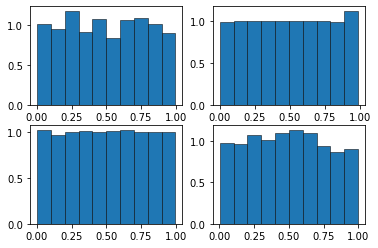

In [10]:
# histogram
fig, _ = plt.subplots(2, 2)
for xi, ax in zip(x, fig.get_axes()):
    ax.hist(xi, density=True, edgecolor="black", linewidth=0.5)

#plt.tight_layout()
#plt.savefig('PRNG_hist.pdf')

plt.show()

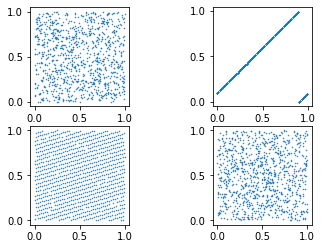

In [11]:
# correlation
fig, _ = plt.subplots(2, 2)
for xi, ax in zip(x, fig.get_axes()):
    ax.scatter(xi[:N-1], xi[1:], marker=".", s=1)
    ax.set_aspect('equal', 'box')

#plt.tight_layout()
#plt.savefig('PRNG_cor.pdf')

plt.show()

## Các phân phối rời rạc

In [12]:
p = 0.2
N = 10**5

x = np.ceil(np.log(1 - np.random.uniform(size=N))/np.log(p))
i = np.arange(1, np.max(x) + 1)

counter = Counter(x)
m = int(max(counter.keys()))
i_list = range(1, m + 1)
pd.DataFrame({
    "$i$": i_list,
    "$P(X=i)$": [round(p**(i - 1)*(1 - p), 5) for i in i_list],
    "Freq": [round(counter[i]/N, 5) for i in i_list]
})

,$i$,$P(X=i)$,Freq
0,1,0.80000,0.79823
1,2,0.16000,0.16067
2,3,0.03200,0.03263
3,4,0.00640,0.00665
4,5,0.00128,0.00150
5,6,0.00026,0.00024
6,7,0.00005,0.00003
7,8,0.00001,0.00003
8,9,0.00000,0.00002


## Phương pháp biến đổi ngược

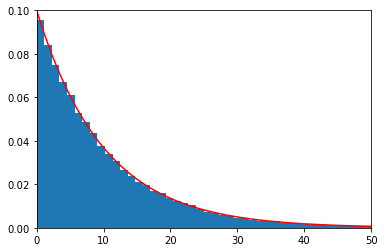

In [13]:
N = 10**5
lamb = 0.1

x = -np.log(1 - np.random.uniform(size=N))/lamb
t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.xlim(0, 50)
plt.ylim(0, 0.1)
plt.plot(t, lamb*np.exp(-lamb*t), "red")

plt.show()

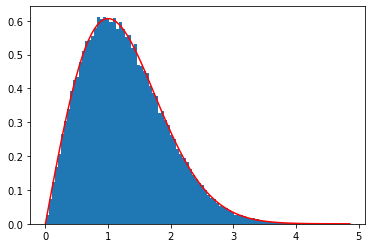

In [14]:
N = 10**5
sigma = 1

x = np.sqrt(-2 * sigma**2 * np.log(1 - np.random.uniform(size=N)))
t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, t/sigma**2 * np.exp(-t**2/(2*sigma**2)), "red")

plt.show()

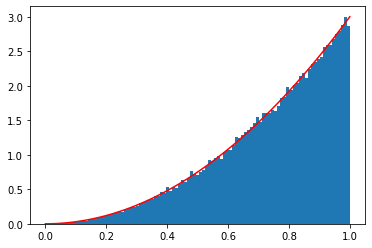

In [15]:
N = 10**5
sigma = 1

x = np.random.uniform(size=N)**(1/3)
t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 3*t**2, "red")

plt.show()

## Phương pháp lấy mẫu loại bỏ

### Lấy mẫu loại bỏ cơ bản

In [16]:
# Algorithm BRS
# Input:
#   N: output sequence length
#   g: sampler for the proposal density
#   p: the acceptance probability
# Output: a tuple (X, T)
#   X: sequence X1, X2, X3, . . . iid with density f
#   T: total number of proposals
def BSR(N, g, p):
    T = 0
    X = []
    i = 0
    while i < N:
        T = T + 1
        Xn = g()
        Un = np.random.uniform(size=1)
        if Un <= p(Xn):
            i = i + 1
            X.append(Xn)

    return (np.array(X), T)

Acceptance rate (Z): 0.7845
0.7853981633974483


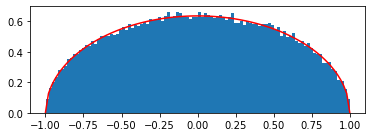

In [17]:
g = lambda: np.random.uniform(-1, 1, size=1)
p = lambda x: np.sqrt(1 - x**2)

N = 10**5

x, T = BSR(N, g, p)
print("Acceptance rate (Z):", round(N/T, 4))
print(np.pi/4)

t = np.linspace(-1, 1, num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.pi*np.sqrt(1 - t**2), "red")
plt.gca().set_aspect('equal')

plt.show()

### Lấy mẫu loại bỏ theo khuôn

In [18]:
# Algorithm ERS
# Input:
#   N: output sequence length
#   f: the non-normalised target density
#   gs: sampler for the proposal density
#   g: the proposal density
#   c > 0: such that f(x) <= c g(x) for all x
# Output: a tuple (X, T)
#   X: sequence X1, X2, X3, . . . iid with density f tiddle
#   T: total number of proposals
def ESR(N, f, gs, g, c):
    T = 0
    X = []
    i = 0
    while i < N:
        T = T + 1
        Xn = gs()
        Un = np.random.uniform(size=1)
        if c*g(Xn)*Un <= f(Xn):
            i = i + 1
            X.append(Xn)

    return (np.array(X), T)

Acceptance rate (Z): 0.7605
0.7601734505331403


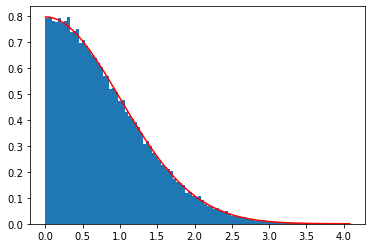

In [19]:
lamb = 1
f = lambda x: 2/np.sqrt(2*np.pi)*np.exp(-x**2/2) if x >= 0 else 0
gs = lambda: np.random.exponential(lamb, size=1)
g = lambda x: lamb*np.exp(-lamb*x)
c = np.sqrt(2/(np.pi*lamb**2))*np.exp(lamb**2/2)

x, T = ESR(N, f, gs, g, c)
print("Acceptance rate (Z):", round(N/T, 4))
print(1/c)

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.sqrt(2*np.pi)*np.exp(-t**2/2), "red")

plt.show()

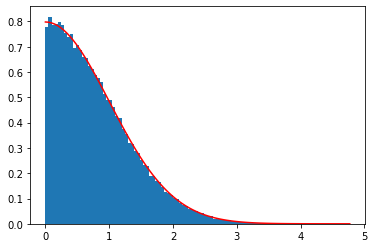

In [20]:
x = np.abs(np.random.normal(size=N))

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.sqrt(2*np.pi)*np.exp(-t**2/2), "red")

plt.show()

Acceptance rate (Z): 0.4987
0.498723268432812


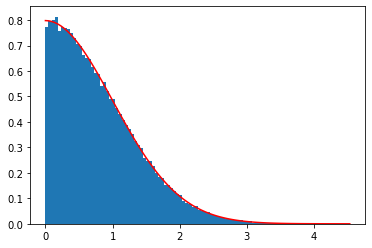

In [21]:
def half_normal(N):
    T = 0
    X = []
    i = 0
    while i < N:
        Xn = np.random.normal(size=1)
        T = T + 1
        if Xn >= 0:
            i = i + 1
            X.append(Xn)
    
    return (np.array(X), T)

x, T = half_normal(N)
print("Acceptance rate (Z):", round(N/T, 4))
print(N/T)

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.sqrt(2*np.pi)*np.exp(-t**2/2), "red")

plt.show()

### Lấy mẫu cho phân phối có điều kiện

In [22]:
a = np.arange(1, 7)
ENa = np.int_(np.round(1/(1 - stats.norm.cdf(a))))
pd.DataFrame({"$a$": a, "$E(N_a)$": ENa})

,$a$,$E(N_a)$
0,1,6
1,2,44
2,3,741
3,4,31574
4,5,3488556
5,6,1013594635


In [23]:
a = np.arange(1, 7)
ENa = np.round(np.exp(-a**2/2)/(a*np.sqrt(2*np.pi)*(1 - stats.norm.cdf(a))), 4)
ENa_e = []
for ai in a:
    f = lambda x: np.exp(-x**2/2) * (1 if x >= ai else 0)
    gs = lambda: np.random.exponential(1/ai, size=1) + ai
    g = lambda x: ai*np.exp(-ai*(x - ai)) * (1 if x >= ai else 0)
    c = np.exp(-ai**2/2)/ai
    N = 10**4

    _, T = ESR(N, f, gs, g, c)
    ENa_e.append(round(T/N, 4))

pd.DataFrame({"$a$": a, "$E(N_a)$": ENa, "Average": ENa_e})

,$a$,$E(N_a)$,Average
0,1,1.5251,1.5266
1,2,1.1866,1.1852
2,3,1.0944,1.0978
3,4,1.0564,1.0560
4,5,1.0373,1.0377
5,6,1.0264,1.0276


### Diễn giải hình học

Acceptance rate: 0.7854 0.7962


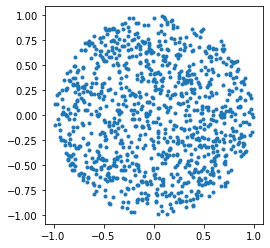

In [24]:
def runif_circle(N):
    xy = []
    T = 0
    i = 0
    while i < N:
        T = T + 1
        Xn, Yn = np.random.uniform(-1, 1, size=2)
        if Xn**2 + Yn**2 <= 1:
            i = i + 1
            xy.append((Xn, Yn))
            
    return (np.array(xy), T)

N = 10**3
xy, T = runif_circle(N)

print("Acceptance rate:", round(np.pi/4, 4), round(N/T, 4))

plt.plot(xy[:, 0], xy[:, 1], ".")
plt.gca().set_aspect('equal')
plt.show()

## Biến đổi của các biến ngẫu nhiên

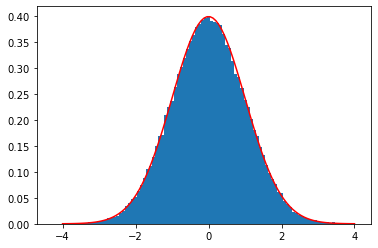

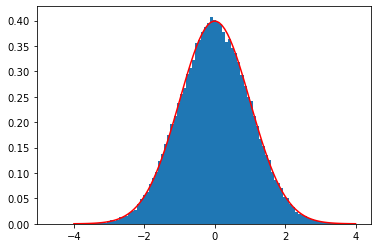

In [25]:
def BoxMuller(N):
    theta = np.random.uniform(0, 2*np.pi, size=N)
    u = np.random.uniform(size=N)
    r = np.sqrt(-2*np.log(u))
    return (r*np.cos(theta), r*np.sin(theta))

N = 10**5

x, y = BoxMuller(N)
t = np.linspace(-4, 4, num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, stats.norm.pdf(t), "red")
plt.show()

plt.hist(y, bins=100, density=True)
plt.plot(t, stats.norm.pdf(t), "red")
plt.show()

### Phương pháp tỉ số đều

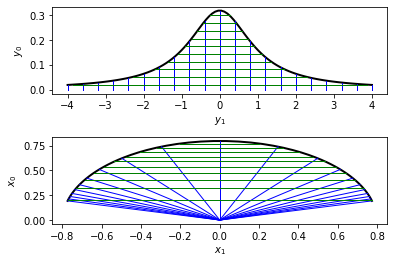

In [26]:
def Cauchy(x):
    return 1/(np.pi*(1 + x**2))

def Cauchy_inv(y):
    return np.sqrt(1/(np.pi*y) - 1)

def phi_inv(y0, y1):
    x0 = np.sqrt(2*y0)
    x1 = x0*y1
    return (x1, x0)

def plot_phi_transform(y1_min, y1_max, N_hor, N_vert, N_p=100):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.subplots_adjust(hspace=0.5)
    
    y1 = np.linspace(y1_min, y1_max, num=N_p)
    y0 = Cauchy(y1)
    ax1.plot(y1, y0, "black", linewidth=2)
    
    y1s = np.linspace(y1_min, y1_max, num=N_vert)
    for y1i in y1s:
        y1 = np.repeat(y1i, N_p)
        y0 = np.linspace(0, Cauchy(y1i), num=N_p)
        ax1.plot(y1, y0, "blue", linewidth=1)
        
    y0_min = 0.02
    y0_max = 1/np.pi - 0.02
    y0s = np.linspace(y0_min, y0_max, num=N_hor)
    for y0i in y0s:
        y0 = np.repeat(y0i, N_p)
        y1 = np.linspace(-Cauchy_inv(y0i), Cauchy_inv(y0i), num=N_p)
        ax1.plot(y1, y0, "green", linewidth=1)
        
    ax1.set_xlabel("$y_1$")
    ax1.set_ylabel("$y_0$")
    
    y1 = np.linspace(y1_min, y1_max, num=N_p)
    y0 = Cauchy(y1)
    ax2.plot(*phi_inv(y0, y1), "black", linewidth=2)
    
    y1s = np.linspace(y1_min, y1_max, num=N_vert)
    for y1i in y1s:
        y1 = np.repeat(y1i, N_p)
        y0 = np.linspace(0, Cauchy(y1i), num=N_p)
        ax2.plot(*phi_inv(y0, y1), "blue", linewidth=1)  

    y0_min = 0.02
    y0_max = 1/np.pi - 0.02
    y0s = np.linspace(y0_min, y0_max, num=N_hor)
    for y0i in y0s:
        y0 = np.repeat(y0i, N_p)
        y1 = np.linspace(-Cauchy_inv(y0i), Cauchy_inv(y0i), num=N_p)
        ax2.plot(*phi_inv(y0, y1), "green", linewidth=1)
        
    ax2.set_xlabel("$x_1$")
    ax2.set_ylabel("$x_0$")
    
    #plt.tight_layout()
    #plt.savefig("RUM.pdf")
    
    plt.show()
    
plot_phi_transform(-4, 4, 10, 21)

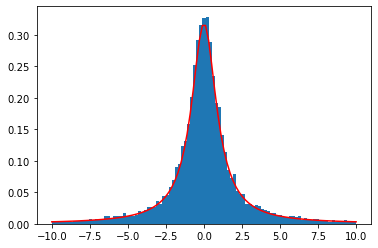

In [27]:
def r_Cauchy(N):
    R = np.sqrt(2/np.pi)
    x = []
    i = 0
    while i < N:
        X0 = np.random.uniform(1e-3, R, size=1)
        X1 = np.random.uniform(-R, R, size=1)
        if X0**2 + X1**2 <= R**2:
            i = i + 1
            x.append(X1/X0)
            
    return np.array(x)

N = 10**4

x_min = -10
x_max = -x_min
x = r_Cauchy(N)
t = np.linspace(x_min, x_max, num=100)

plt.hist(x, bins=list(t), density=True)
plt.plot(t, 1/(np.pi*(1 + t**2)), "r")

plt.show()